In [ ]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd

In [ ]:
def download_data(ticker, start_date, end_date):
    asset = yf.Ticker(ticker)
    data = asset.history(start=start_date, end=end_date)
    return data

In [ ]:
data = download_data("AAPL", "2020-01-01", "2024-10-1")
print(data.head())

                                Open       High        Low      Close  \
Date                                                                    
2020-01-02 00:00:00-05:00  71.878871  72.936773  71.624105  72.876114   
2020-01-03 00:00:00-05:00  72.099664  72.931908  71.941952  72.167603   
2020-01-06 00:00:00-05:00  71.284415  72.781483  71.032070  72.742661   
2020-01-07 00:00:00-05:00  72.752371  73.009565  72.179750  72.400551   
2020-01-08 00:00:00-05:00  72.102083  73.868482  72.102083  73.565186   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-01-02 00:00:00-05:00  135480400        0.0           0.0  
2020-01-03 00:00:00-05:00  146322800        0.0           0.0  
2020-01-06 00:00:00-05:00  118387200        0.0           0.0  
2020-01-07 00:00:00-05:00  108872000        0.0           0.0  
2020-01-08 00:00:00-05:00  132079200        0.0           0.0  


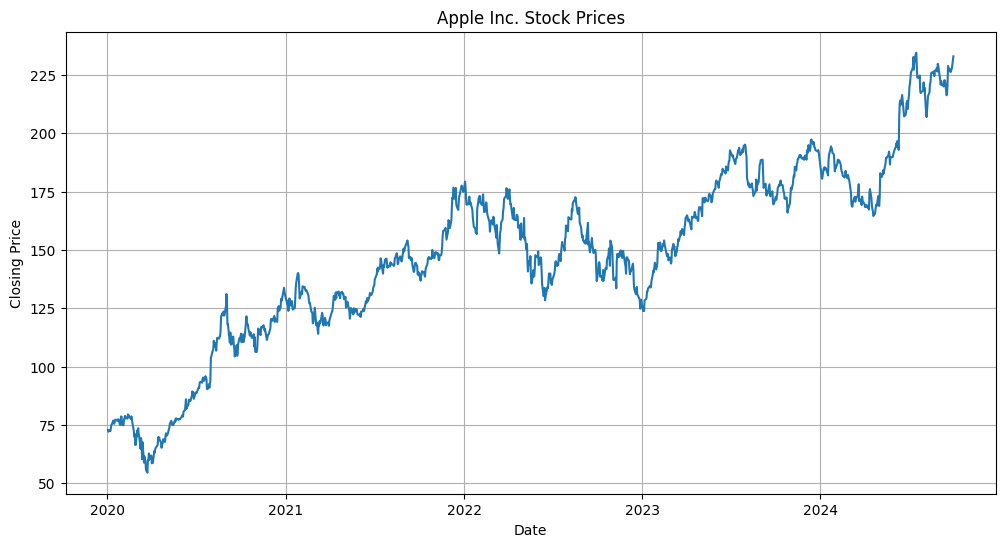

In [ ]:
def plot_line(data, title, ylabel):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data["Close"])
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

plot_line(data, "Apple Inc. Stock Prices", "Closing Price")

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


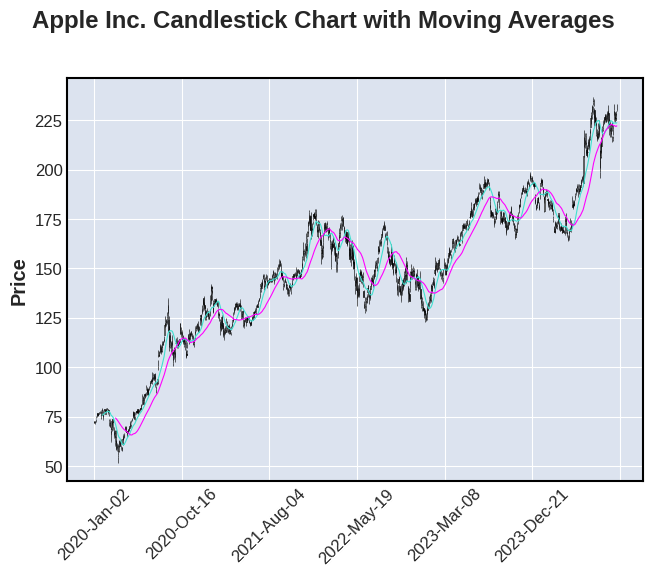

In [ ]:
def plot_candlestick(data, title):
    mpf.plot(data, type="candle", title=title, ylabel="Price", mav=(20, 50))

plot_candlestick(data, "Apple Inc. Candlestick Chart with Moving Averages")

In [ ]:
class User:
    def __init__(self, name, risk_tolerance, investment_horizon):
        self.name = name
        self.risk_tolerance = risk_tolerance
        self.investment_horizon = investment_horizon

In [ ]:
class RecommendationSystem:
    def __init__(self, user, data):
        self.user = user
        self.data = data

    def get_recommendation(self):
        filtered_assets = self.data[self.data["Close"].notna()]
        returns = filtered_assets["Close"].pct_change()
        average_returns = returns.mean()
        filtered_assets = pd.DataFrame(average_returns[average_returns <= self.user.risk_tolerance])
        sorted_assets = filtered_assets.sort_values(by=0, ascending=False)
        top_assets = sorted_assets.head(self.user.investment_horizon)
        return top_assets.index.tolist()

In [ ]:
on_system = RecommendationSystem(user, data)
recommendation = recommendation_system.get_recommendation()

print(f"Recommended assets for {user.name}: {recommendation}")

Recommended assets for John Doe: [0]
